In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 22.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 24.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 72.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter



     |████████████████████████████████| 50 kB 7.6 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


# Installed Python Libraries now import them

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

# Load Authorization Information

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

# Connect to MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo, we changed name from demo to lab 9
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

# Use the Rest API to Collect Tweets

Authorization

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define query for rest API

In [10]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # comment out location
q = "covid19"                               #define the keywords, tweets contain covid19

The retained tweets will contain election and be located in harrisonburg

In [11]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode BUT you don't have to
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass



'Thu Nov 04 19:01:38 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:30 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 04 19:01:25 +0000 2021'
'Thu Nov 0

Introduce the concept of time!

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass



'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:55 +0000 2021'
'Thu Nov 04 19:00:55 +0000 2021'
'Thu Nov 04 19:00:54 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:51 +0000 2021'
'Thu Nov 04 19:00:50 +0000 2021'
'Thu Nov 04 19:00:49 +0000 2021'
'Thu Nov 04 19:00:49 +0000 2021'
'Thu Nov 04 19:00:49 +0000 2021'
'Thu Nov 04 19:00:48 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:46 +0000 2021'
'Thu Nov 04 19:00:46 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:59:24 +0000 2021'
'Thu Nov 04 18:59:24 +0000 2021'
'Thu Nov 04 18:59:23 +0000 2021'
'Thu Nov 04 18:59:23 +0000 2021'
'Thu Nov 04 18:59:22 +0000 2021'
'Thu Nov 04 18:59:22 +0000 2021'
'Thu Nov 04 18:59:22 +0000 2021'
'Thu Nov 04 18:59:21 +0000 2021'
'Thu Nov 04 18:59:21 +0000 2021'
'Thu Nov 04 18:59:21 +0000 2021'
'Thu Nov 04 18:59:20 +0000 2021'
'Thu Nov 04 18:59:19 +0000 2021'
'Thu Nov 04 18:59:17 +0000 2021'
'Thu Nov 04 18:59:17 +0000 2021'
'Thu Nov 04 18:59:17 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:15 +0000 2021'
'Thu Nov 04 18:59:15 +0000 2021'
'Thu Nov 04 18:59:14 +0000 2021'
'Thu Nov 04 18:59:13 +0000 2021'
'Thu Nov 04 18:59:12 +0000 2021'
'Thu Nov 04 18:59:12 +0000 2021'
'Thu Nov 04 18:59:10 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:56:49 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:47 +0000 2021'
'Thu Nov 04 18:56:46 +0000 2021'
'Thu Nov 04 18:56:46 +0000 2021'
'Thu Nov 04 18:56:46 +0000 2021'
'Thu Nov 04 18:56:45 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:43 +0000 2021'
'Thu Nov 04 18:56:43 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:41 +0000 2021'
'Thu Nov 04 18:56:40 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:54:51 +0000 2021'
'Thu Nov 04 18:54:51 +0000 2021'
'Thu Nov 04 18:54:50 +0000 2021'
'Thu Nov 04 18:54:49 +0000 2021'
'Thu Nov 04 18:54:49 +0000 2021'
'Thu Nov 04 18:54:48 +0000 2021'
'Thu Nov 04 18:54:48 +0000 2021'
'Thu Nov 04 18:54:47 +0000 2021'
'Thu Nov 04 18:54:47 +0000 2021'
'Thu Nov 04 18:54:46 +0000 2021'
'Thu Nov 04 18:54:46 +0000 2021'
'Thu Nov 04 18:54:44 +0000 2021'
'Thu Nov 04 18:54:43 +0000 2021'
'Thu Nov 04 18:54:43 +0000 2021'
'Thu Nov 04 18:54:41 +0000 2021'
'Thu Nov 04 18:54:40 +0000 2021'
'Thu Nov 04 18:54:40 +0000 2021'
'Thu Nov 04 18:54:39 +0000 2021'
'Thu Nov 04 18:54:39 +0000 2021'
'Thu Nov 04 18:54:36 +0000 2021'
'Thu Nov 04 18:54:36 +0000 2021'
'Thu Nov 04 18:54:35 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:33 +0000 2021'
'Thu Nov 04 18:54:33 +0000 2021'
'Thu Nov 04 18:54:32 +0000 2021'
'Thu Nov 04 18:54:31 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:21 +0000 2021'
'Thu Nov 04 18:52:19 +0000 2021'
'Thu Nov 04 18:52:18 +0000 2021'
'Thu Nov 04 18:52:18 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:12 +0000 2021'
'Thu Nov 04 18:52:12 +0000 2021'
'Thu Nov 04 18:52:11 +0000 2021'
'Thu Nov 04 18:52:10 +0000 2021'
'Thu Nov 04 18:52:10 +0000 2021'
'Thu Nov 04 18:52:10 +0000 2021'
'Thu Nov 04 18:52:09 +0000 2021'
'Thu Nov 04 18:52:09 +0000 2021'
'Thu Nov 04 18:52:09 +0000 2021'
'Thu Nov 04 18:52:08 +0000 2021'
'Thu Nov 04 18:52:07 +0000 2021'
'Thu Nov 04 18:52:07 +0000 2021'
'Thu Nov 04 18:52:06 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:08 +0000 2021'
'Thu Nov 04 18:50:07 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:49:59 +0000 2021'
'Thu Nov 04 18:49:59 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:48:02 +0000 2021'
'Thu Nov 04 18:48:02 +0000 2021'
'Thu Nov 04 18:48:02 +0000 2021'
'Thu Nov 04 18:48:01 +0000 2021'
'Thu Nov 04 18:48:01 +0000 2021'
'Thu Nov 04 18:48:00 +0000 2021'
'Thu Nov 04 18:47:59 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:56 +0000 2021'
'Thu Nov 04 18:47:56 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:54 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:52 +0000 2021'
'Thu Nov 04 18:47:52 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:43 +0000 2021'
'Thu Nov 04 18:45:43 +0000 2021'
'Thu Nov 04 18:45:42 +0000 2021'
'Thu Nov 04 18:45:41 +0000 2021'
'Thu Nov 04 18:45:40 +0000 2021'
'Thu Nov 04 18:45:40 +0000 2021'
'Thu Nov 04 18:45:40 +0000 2021'
'Thu Nov 04 18:45:39 +0000 2021'
'Thu Nov 04 18:45:37 +0000 2021'
'Thu Nov 04 18:45:37 +0000 2021'
'Thu Nov 04 18:45:36 +0000 2021'
'Thu Nov 04 18:45:35 +0000 2021'
'Thu Nov 04 18:45:35 +0000 2021'
'Thu Nov 04 18:45:34 +0000 2021'
'Thu Nov 04 18:45:34 +0000 2021'
'Thu Nov 04 18:45:32 +0000 2021'
'Thu Nov 04 18:45:31 +0000 2021'
'Thu Nov 04 18:45:30 +0000 2021'
'Thu Nov 04 18:45:30 +0000 2021'
'Thu Nov 04 18:45:29 +0000 2021'
'Thu Nov 04 18:45:29 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:43:42 +0000 2021'
'Thu Nov 04 18:43:41 +0000 2021'
'Thu Nov 04 18:43:41 +0000 2021'
'Thu Nov 04 18:43:40 +0000 2021'
'Thu Nov 04 18:43:39 +0000 2021'
'Thu Nov 04 18:43:38 +0000 2021'
'Thu Nov 04 18:43:38 +0000 2021'
'Thu Nov 04 18:43:38 +0000 2021'
'Thu Nov 04 18:43:38 +0000 2021'
'Thu Nov 04 18:43:36 +0000 2021'
'Thu Nov 04 18:43:36 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:30 +0000 2021'
'Thu Nov 04 18:43:30 +0000 2021'
'Thu Nov 04 18:43:29 +0000 2021'
'Thu Nov 04 18:43:29 +0000 2021'
'Thu Nov 04 18:43:26 +0000 2021'
'Thu Nov 04 18:43:26 +0000 2021'
'Thu Nov 04 18:43:25 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:41:32 +0000 2021'
'Thu Nov 04 18:41:31 +0000 2021'
'Thu Nov 04 18:41:30 +0000 2021'
'Thu Nov 04 18:41:30 +0000 2021'
'Thu Nov 04 18:41:30 +0000 2021'
'Thu Nov 04 18:41:25 +0000 2021'
'Thu Nov 04 18:41:25 +0000 2021'
'Thu Nov 04 18:41:24 +0000 2021'
'Thu Nov 04 18:41:24 +0000 2021'
'Thu Nov 04 18:41:24 +0000 2021'
'Thu Nov 04 18:41:23 +0000 2021'
'Thu Nov 04 18:41:23 +0000 2021'
'Thu Nov 04 18:41:23 +0000 2021'
'Thu Nov 04 18:41:22 +0000 2021'
'Thu Nov 04 18:41:22 +0000 2021'
'Thu Nov 04 18:41:21 +0000 2021'
'Thu Nov 04 18:41:20 +0000 2021'
'Thu Nov 04 18:41:20 +0000 2021'
'Thu Nov 04 18:41:20 +0000 2021'
'Thu Nov 04 18:41:19 +0000 2021'
'Thu Nov 04 18:41:18 +0000 2021'
'Thu Nov 04 18:41:18 +0000 2021'
'Thu Nov 04 18:41:18 +0000 2021'
'Thu Nov 04 18:41:17 +0000 2021'
'Thu Nov 04 18:41:17 +0000 2021'
'Thu Nov 04 18:41:17 +0000 2021'
'Thu Nov 04 18:41:15 +0000 2021'
'Thu Nov 04 18:41:15 +0000 2021'
'Thu Nov 04 18:41:14 +0000 2021'
'Thu Nov 04 18:41:14 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:39:24 +0000 2021'
'Thu Nov 04 18:39:24 +0000 2021'
'Thu Nov 04 18:39:22 +0000 2021'
'Thu Nov 04 18:39:22 +0000 2021'
'Thu Nov 04 18:39:22 +0000 2021'
'Thu Nov 04 18:39:21 +0000 2021'
'Thu Nov 04 18:39:20 +0000 2021'
'Thu Nov 04 18:39:19 +0000 2021'
'Thu Nov 04 18:39:19 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:15 +0000 2021'
'Thu Nov 04 18:39:14 +0000 2021'
'Thu Nov 04 18:39:14 +0000 2021'
'Thu Nov 04 18:39:14 +0000 2021'
'Thu Nov 04 18:39:13 +0000 2021'
'Thu Nov 04 18:39:13 +0000 2021'
'Thu Nov 04 18:39:13 +0000 2021'
'Thu Nov 04 18:39:11 +0000 2021'
'Thu Nov 04 18:39:09 +0000 2021'
'Thu Nov 04 18:39:09 +0000 2021'
'Thu Nov 04 18:39:09 +0000 2021'
'Thu Nov 04 18:39:08 +0000 2021'
'Thu Nov 04 18:39:08 +0000 2021'
'Thu Nov 04 18:39:08 +0000 2021'
'Thu Nov 04 18:39:07 +0000 2021'
'Thu Nov 04 18:39:06 +0000 2021'
'Thu Nov 04 18:39:06 +0000 2021'
'Thu Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1456330134827458561&oauth_consumer_key=oern9t47fk6eAqylUEmg01AJF&oauth_nonce=11526291477429141908&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1636053306&oauth_token=60388598-lBtzHrw6MEFRo23JxlTGeJf80D9FYkonpBgA1wlm3&oauth_version=1.0&q=covid19&oauth_signature=RYhF3x1ZKuMP71AfCyJbjWeEW5U%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

# View Collected Tweets

Print number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

2773
2402


Create a text index and print the Tweets containing specific keywords

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain covid

Use pprint to display tweets

In [16]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: CBS 58 News
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Mrs.H. 💙 #MaskUp 😷
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Dr. Rachel Roper
text: We will have as much COVID as measles as soon as everyone gets vaccinated for COVID as much as they have gotten vac… https://t.co/BPTlZ4VMRR
----
name: WIDeptHealthServices
text: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vac… https://t.co/PgDWIHqFlw
----
name: Gary McFarlane
text: When are masks most useful? COVID cases offer hints - Participants exposed to someone with COVID-19 had lower odds… https://t.co/UO20lh7kMR
----
name: Proclaim Publishers
text: @Merck 1) Low death rate for covid...

2) masks "work" for covid...

3) a vaccine that "wo

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

Use pandas to display the tweets

In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,6184310401acb4acc1ee278c,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6184311a01acb4acc1ee2bc4,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
2,6184310a01acb4acc1ee28ae,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
3,6184313a01acb4acc1ee31d5,Thu Nov 04 18:39:01 +0000 2021,1456330158986731520,1456330158986731520,"RT @WHO: @DrTedros ""No more #COVID19 vaccines ...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 15:50:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
4,6184313501acb4acc1ee30bb,Thu Nov 04 18:41:18 +0000 2021,1456330730674470921,1456330730674470921,#antivax #vaccine #covid19 #pandemic #vaccinat...,False,"{'hashtags': [{'text': 'antivax', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",NaN,...,False,False,und,NaN,"{'media': [{'id': 1456330082155470851, 'id_str...",False,NaN,NaN,NaN,NaN
5,6184311c01acb4acc1ee2c21,Thu Nov 04 18:50:59 +0000 2021,1456333170727587841,1456333170727587841,RT @EpochTimes: The #CDC altered the definitio...,False,"{'hashtags': [{'text': 'CDC', 'indices': [20, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:10:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
6,6184311101acb4acc1ee29fe,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6184311701acb4acc1ee2b20,Thu Nov 04 18:53:14 +0000 2021,1456333733519372294,1456333733519372294,RT @Thompson_2017: MEP Christine ANDERSON spea...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:58:27 +0000 2021...,NaN,False,1.456173e+18,1456173087792189441,NaN,NaN
8,6184313901acb4acc1ee318d,Thu Nov 04 18:39:45 +0000 2021,1456330340117647367,1456330340117647367,RT @Pfizer_UK: As the world undergoes a vaccin...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Fri Oct 22 10:30:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
9,6184311c01acb4acc1ee2c15,Thu Nov 04 18:51:05 +0000 2021,1456333193070747650,1456333193070747650,@MarieMarchi P

<AxesSubplot:>

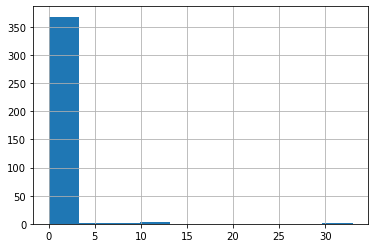

In [20]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count